In [123]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set()

matplotlib.style.use('ggplot')

In [124]:
df = pd.read_csv('shm.tsv', sep='\t').fillna(0)
df['synonymous_frac'] = (df['synonymous'] / df['size']).round(1)
df['replacement_frac'] = (df['replacement'] / df['size']).round(1)
df[:5]

,clone_id,size,subject,synonymous,replacement,synonymous_frac,replacement_frac
0,20,2,D267,0.0,0.0,0.0,0.0
1,18,24,D267,48.0,72.0,2.0,3.0
2,17,2,D267,6.0,20.0,3.0,10.0
3,24,26,D267,0.0,8.0,0.0,0.3
4,25,7,D267,21.0,42.0,3.0,6.0


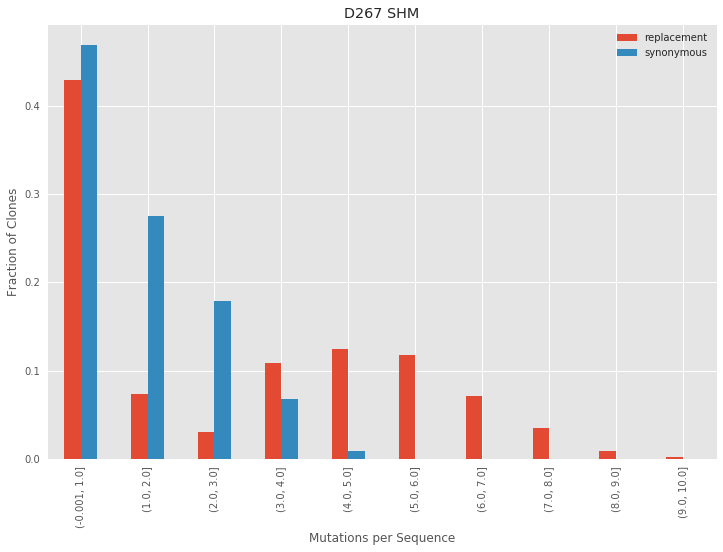

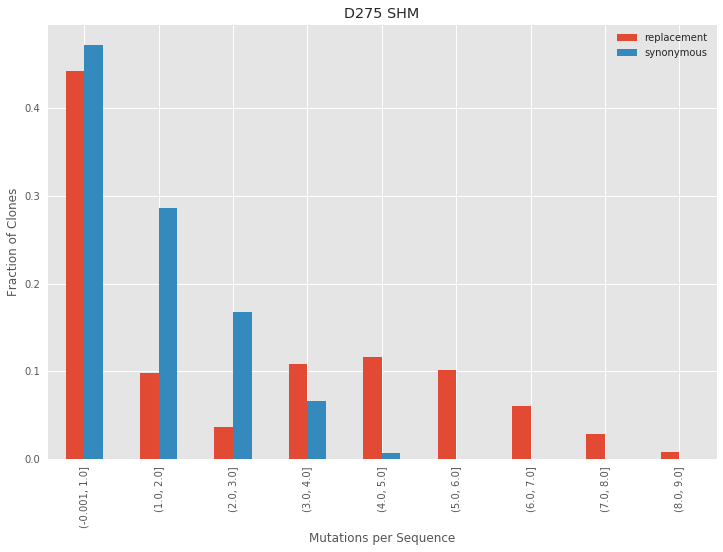

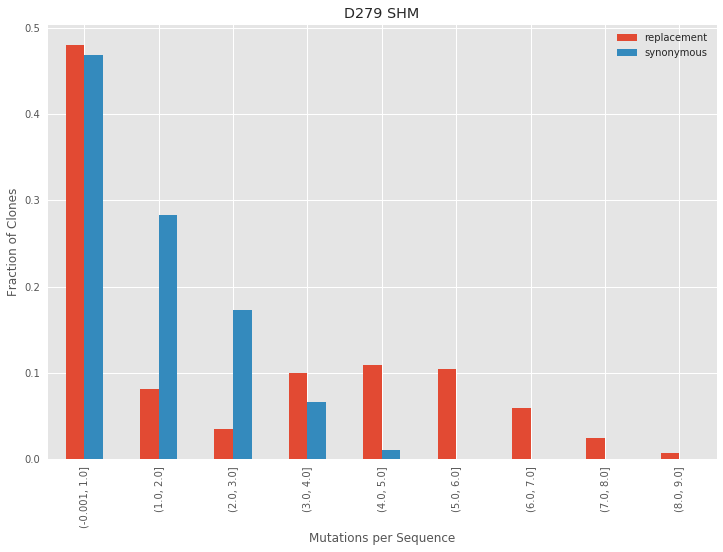

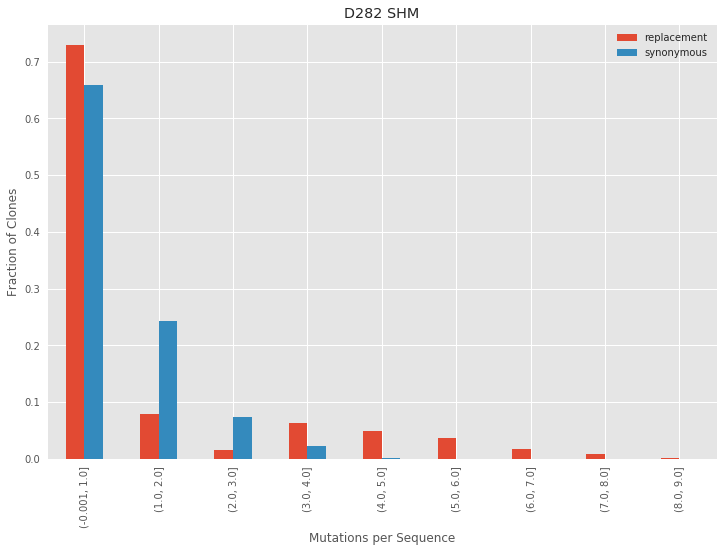

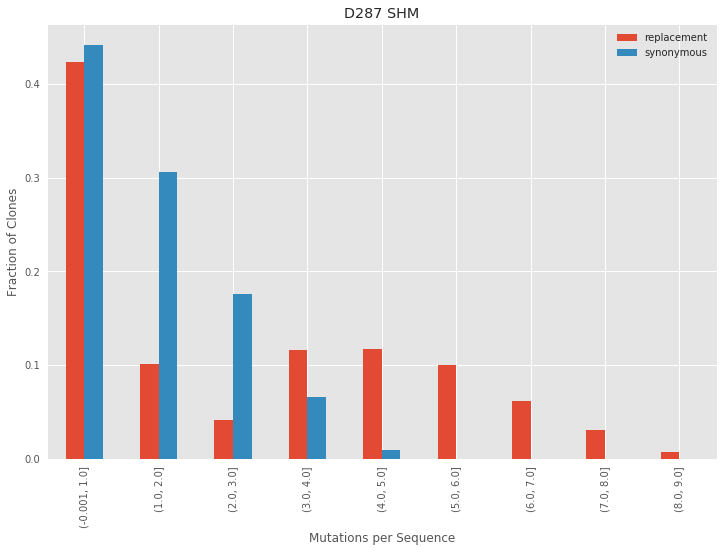

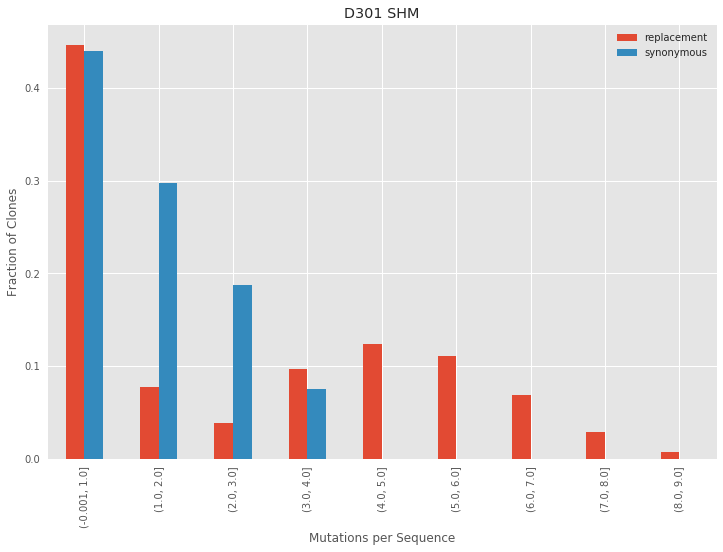

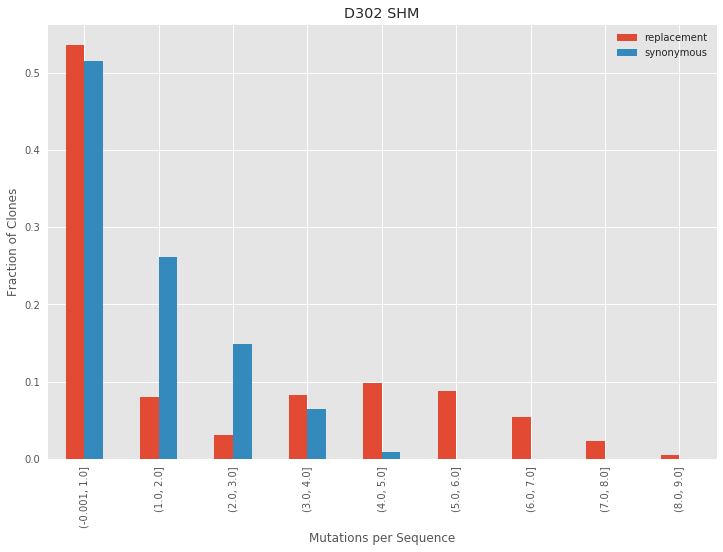

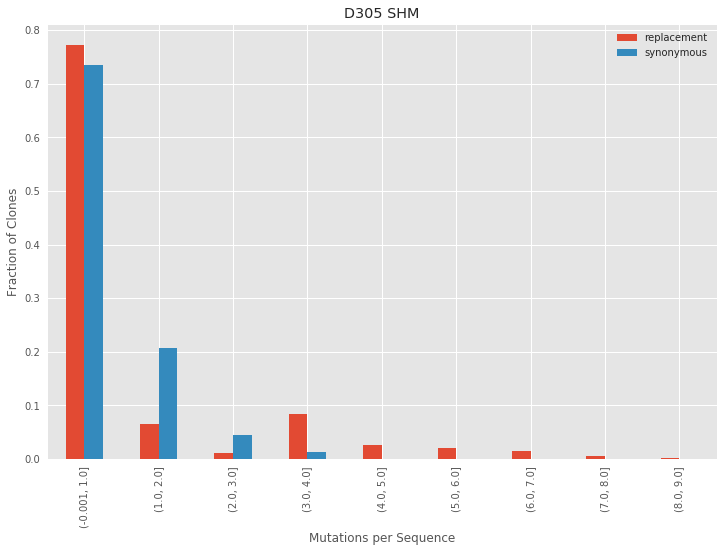

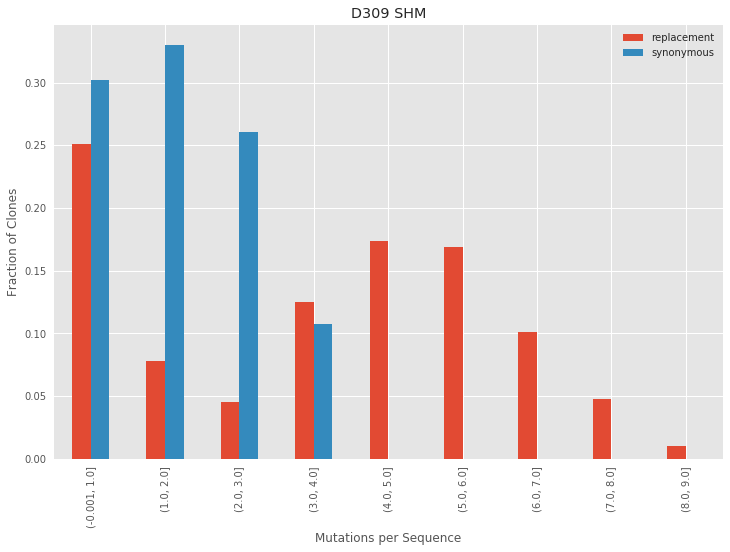

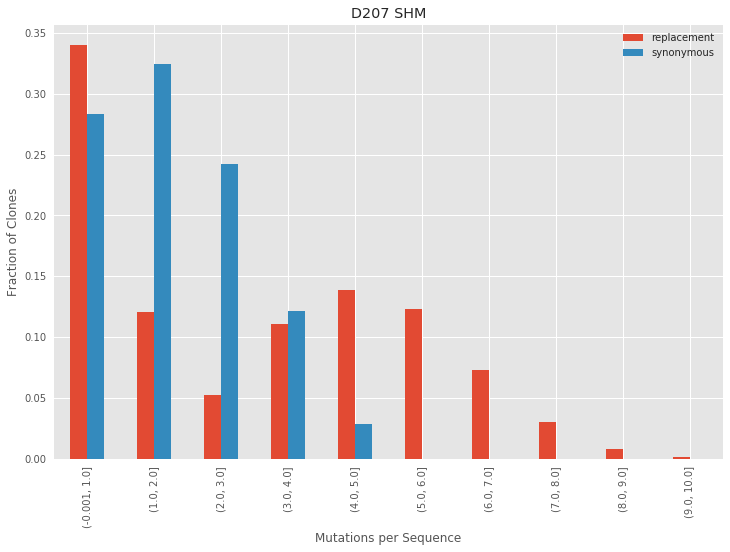

In [137]:
for subject in df.subject.unique():
    pdf = df[df.subject == subject][['synonymous_frac', 'replacement_frac']]
    pdf_s = pdf.synonymous_frac.value_counts(bins=np.arange(0, pdf.synonymous_frac.max(), 1)).sort_index()
    pdf_r = pdf.replacement_frac.value_counts(bins=np.arange(0, pdf.replacement_frac.max(), 1)).sort_index()
    pdf = pd.DataFrame({'synonymous': pdf_s, 'replacement': pdf_r})
    pdf = pdf / pdf.sum(axis=0)
    ax = pdf.plot.bar(figsize=(12, 8))
    ax.set_title(subject + ' SHM')
    ax.set_xlabel('Mutations per Sequence')
    ax.set_ylabel('Fraction of Clones')
    pdf.to_csv('shm_{}.tsv'.format(subject), sep='\t')
    plt.savefig('shm_{}.pdf'.format(subject), bbox_inches='tight')